In [1]:
# Install latest version from GitHub
!pip install -q -U git+https://github.com/jdvelasq/techminer

# Terms by year

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from techminer import DataFrame, Plot

#
# Data loading
#
df = DataFrame(
    pd.read_json(
        "https://raw.githubusercontent.com/jdvelasq/techminer/master/data/tutorial/"
        + "cleaned-data.json",
        orient="records",
        lines=True,
    )
)

#
# Columns of the dataframe
#
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Affiliations', 'Document Type', 'Access Type', 'Source', 'EID',
       'Abstract', 'Author Keywords', 'Index Keywords', 'References',
       'keywords', 'CONF', 'fingerprint', 'keywords_cleaned', 'ID',
       'top_10_Authors_freq', 'top_10_keywords_freq',
       'top_10_Source_title_freq', 'top_10_Authors_cited_by',
       'top_10_keywords_cited_by', 'top_10_Source_title_cited_by'],
      dtype='object')

## Document type

In [3]:
df.documents_by_term_per_year(column="Document Type")

,Document Type,Year,Num Documents,ID
0,Article,2010,1,[143]
1,Conference Paper,2010,1,[144]
2,Conference Review,2010,1,[142]
3,Article,2011,1,[140]
4,Conference Paper,2011,1,[141]
5,Article,2012,1,[138]
6,Conference Paper,2012,1,[139]
7,Article,2013,3,"[134, 135, 136]"
8,Book Chapter,2013,1,[137]
9,Article,2014,2,"[131, 132]"


In [4]:
df.documents_by_term_per_year(column="Document Type", as_matrix=True)

,Article,Article in Press,Book Chapter,Conference Paper,Conference Review
2010,1,0,0,1,1
2011,1,0,0,1,0
2012,1,0,0,1,0
2013,3,0,1,0,0
2014,2,0,0,1,0
2015,1,0,0,1,0
2016,3,0,0,2,0
2017,7,0,0,12,0
2018,8,2,0,42,0
2019,25,0,0,28,0


In [13]:
heatmap(df.documents_by_term_per_year(column="Document Type", as_matrix=True), cmap='Blues')
        #.style.background_gradient('Blues')

AttributeError: 'Styler' object has no attribute 'backgroud_gradient'

In [5]:
from techminer import heatmap

heatmap(df.documents_by_term_per_year(column="Document Type", as_matrix=True), cmap='Blues')

AttributeError: 'Styler' object has no attribute 'backgroud_gradient'

In [ ]:
Plot(df.documents_by_term_per_year(column="Document Type", as_matrix=True)).heatmap(cmap='Blues')

## Source title

In [ ]:
df.documents_by_term_per_year(column="Source title").head(20)

In [ ]:
df.documents_by_term_per_year(column="Source title", minmax=(2, 4))

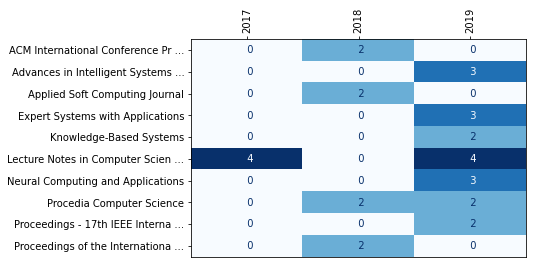

In [4]:
Plot(
    df.documents_by_term_per_year(column="Source title", as_matrix=True, minmax=(2, 4))
).heatmap(cmap='Blues')


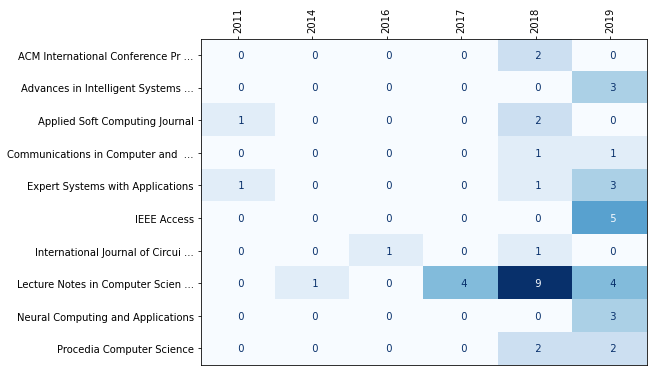

In [5]:
#
# Selects the top 10 journals by frequency
#
plt.figure(figsize=(8, 6))
top_sources = DataFrame(df[df.top_10_Source_title_freq])
Plot(top_sources.documents_by_term_per_year(column="Source title", as_matrix=True)).heatmap(
    cmap="Blues"
)

## Authors

In [6]:
df.documents_by_term_per_year(column="Authors", sep=",").head(20)

,Authors,Year,Num Documents,ID
0,Ghazali R.,2011,1,[140]
1,Hsiao H.-F.,2011,1,[141]
2,Hsieh T.-J.,2011,1,[141]
3,Hussain A.J.,2011,1,[140]
4,Liatsis P.,2011,1,[140]
5,Yeh W.-C.,2011,1,[141]
6,Al-Askar H.,2014,1,[133]
7,Al-Jumeily D.,2014,1,[133]
8,Hussain A.J.,2014,1,[133]
9,Di Persio L.,2016,1,[127]


In [8]:
top_authors = DataFrame(df[df.top_10_Authors_freq])
top_authors.documents_by_term_per_year(column="Authors", sep=",", as_matrix=True)

,Al-Askar H.,Al-Jumeily D.,Arevalo A.,Ghazali R.,Hernandez G.,Hussain A.J.,Leon D.,Liatsis P.,Nino J.,Sandoval J.
2011,0,0,0,1,0,1,0,1,0,0
2014,1,1,0,0,0,1,0,0,0,0
2018,0,0,2,0,2,0,2,0,2,2
2019,0,0,1,0,1,0,1,0,1,1


## Keywords

In [14]:
df.documents_by_term_per_year(column="keywords", sep=";").head(5)

,keywords,Year,Num Documents,ID
0,Classification Methods,2011,2,"[140, 141]"
1,Commerce,2011,2,"[140, 141]"
2,Deep Learning,2011,2,"[140, 141]"
4,Embeddings,2011,2,"[140, 141]"
5,Finance,2011,2,"[140, 141]"
6,Forecast,2011,2,"[140, 141]"
7,Forecasting,2011,2,"[140, 141]"
8,Granger Causality,2011,2,"[140, 141]"
9,Human,2011,2,"[140, 141]"
10,Machine Learning,2011,2,"[140, 141]"


In [17]:
df.documents_by_term_per_year(
    column="keywords_cleaned", sep=";", as_matrix=True, minmax=(6, 20)
)

,algorithms,commerce,deep learning,forecasting,long short term memory network,market,neural networks,prediction,recurrent neural networks,time series,trading
2018,0,8,10,13,7,13,8,0,0,12,12
2019,6,0,9,13,8,8,11,6,8,13,9


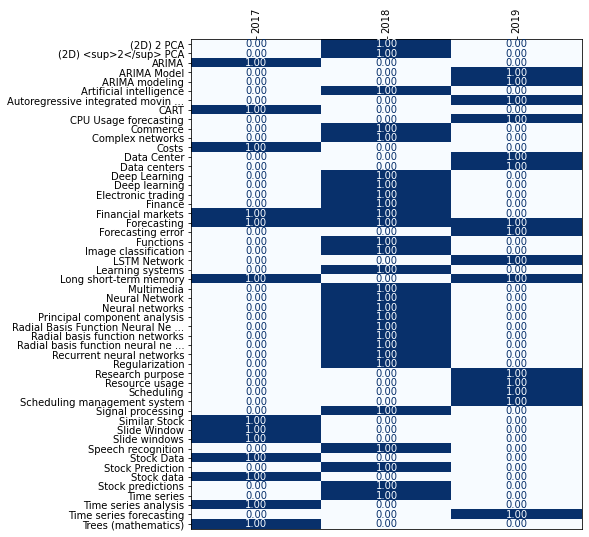

In [21]:
plt.figure(figsize=(7, 9))
top_keywords =  DataFrame(df[df.top_10_keywords_freq])
Plot(
    top_keywords.documents_by_term_per_year(column="keywords", sep=";", as_matrix=True)
).heatmap(cmap='Blues')